# **RNN Introduction**


## Importing required libraries


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [ ]:
df = pd.read_csv('traffic.csv')
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [ ]:
df['Junction'].value_counts()

## Visualization

In [7]:
df['DateTime'] = pd.to_datetime(df['DateTime'])


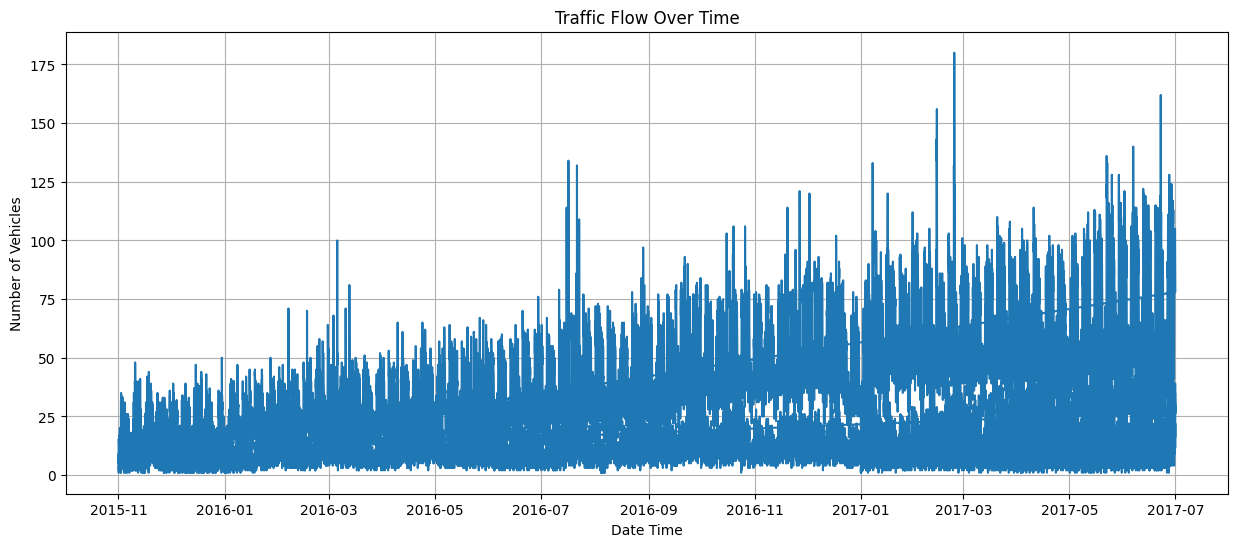

In [8]:


plt.figure(figsize=(15,6))
plt.plot(df['DateTime'], df['Vehicles'])
plt.xlabel('Date Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Flow Over Time')
plt.grid(True)
plt.show()


## Split the data into train and test

In [14]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]


In [16]:
n_past = 60
X_train, y_train = [], []
for i in range(n_past, len(train_data)):
    X_train.append(train_data['Vehicles'].iloc[i - n_past:i].values)
    y_train.append(train_data['Vehicles'].iloc[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(n_past, len(test_data)):
    X_test.append(test_data['Vehicles'].iloc[i - n_past:i].values)
    y_test.append(test_data['Vehicles'].iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print("\n")
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(38436, 60)
(38436,)


Testing set size:-
(9564, 60)
(9564,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Modeling


In [22]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_3 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [23]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/100
1202/1202 [==============================] - 59s 47ms/step - loss: 341.3181 - val_loss: 34.2468
Epoch 2/100
1202/1202 [==============================] - 55s 46ms/step - loss: 104.5414 - val_loss: 29.6617
Epoch 3/100
1202/1202 [==============================] - 55s 45ms/step - loss: 70.6536 - val_loss: 29.5942
Epoch 4/100
1202/1202 [==============================] - 56s 46ms/step - loss: 61.9983 - val_loss: 36.2738
Epoch 5/100
1202/1202 [==============================] - 54s 45ms/step - loss: 59.1437 - val_loss: 29.5390
Epoch 6/100
1202/1202 [==============================] - 54s 45ms/step - loss: 56.8346 - val_loss: 30.1991
Epoch 7/100
1202/1202 [==============================] - 55s 46ms/step - loss: 54.4341 - val_loss: 29.3358
Epoch 8/100
1202/1202 [==============================] - 55s 46ms/step - loss: 52.8016 - val_loss: 28.8994
Epoch 9/100
1202/1202 [==============================] - 55s 45ms/step - loss: 50.1018 - val_loss: 28.1989
Epoch 10/100
1202/1202 [===========

## Visualization of results


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

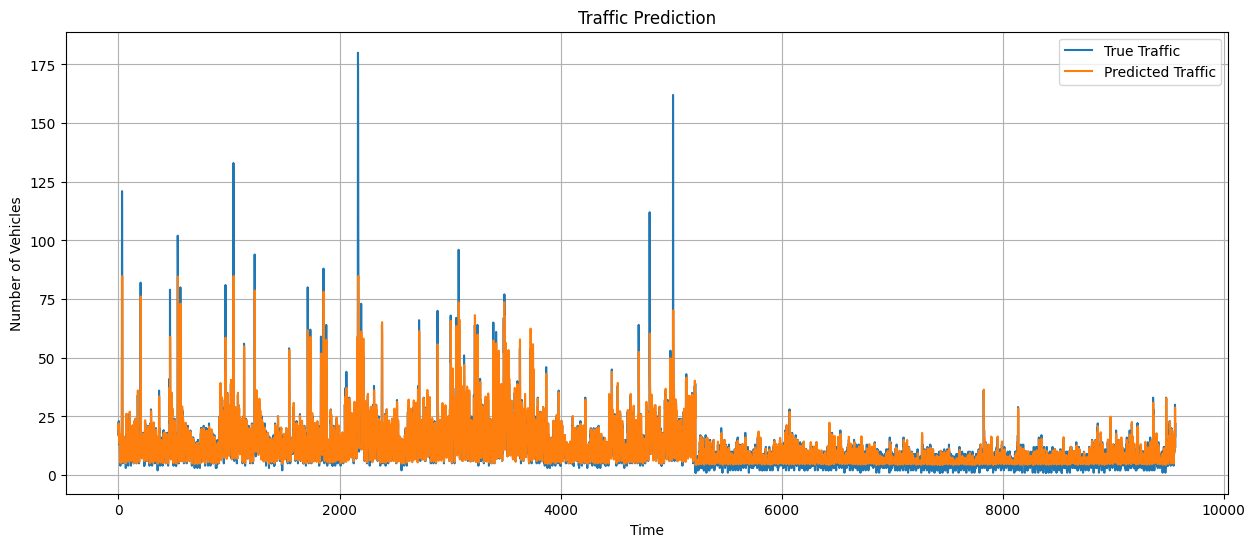

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, label='True Traffic')
plt.plot(test_predict, label='Predicted Traffic')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.title('Traffic Prediction')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(rmse)

5.310258483647634
